In [59]:
import tensorflow as tf
import pandas as pd

import array 
import sklearn
from sklearn.metrics import confusion_matrix
import pylab as pl
import matplotlib.pyplot as plt

FilePath = "/home/nramvinojen/Programs/Workbench/24Jan2019/"
ext = ".jpg"

RunFolder = "28Jan2019"
FV_count = 100

In [60]:
# If GPU is available: 
config = tf.ConfigProto()
config.log_device_placement = True
config.allow_soft_placement = True
config.gpu_options.allocator_type = 'BFC'

# Limit the maximum memory used
config.gpu_options.per_process_gpu_memory_fraction = 0.1

# set session config
tf.keras.backend.set_session(tf.Session(config=config))

In [61]:
# load json and create model
#from keras.models import model_from_json
#json_file = open(FilePath  + "Runs/" + RunFolder + "/ModelsAndWeights/321738_100FV_CNN_8Class.json", 'r')
#loaded_model_json = json_file.read()
#json_file.close()
#loaded_model = model_from_json(loaded_model_json)
# load weights into new model
#loaded_model.load_weights(FilePath + "Runs/" + RunFolder + "/ModelsAndWeights/321729_100FV_CNN_8Class_te23_tr30.h5")
#print("Loaded model from disk")


loaded_model = tf.keras.models.load_model(FilePath + "Runs/" + RunFolder + "/ModelsAndWeights/ModandWeig_100FV_CNN_8Class_Tr28_Te23.h5")
loaded_model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_64 (Dense)             (None, 30)                3030      
_________________________________________________________________
dropout_29 (Dropout)         (None, 30)                0         
_________________________________________________________________
batch_normalization_29 (Batc (None, 30)                120       
_________________________________________________________________
dense_65 (Dense)             (None, 8)                 248       
Total params: 3,398
Trainable params: 3,338
Non-trainable params: 60
_________________________________________________________________


In [62]:
# load dataset
dataframe = pd.read_csv(FilePath +"Runs/" + RunFolder + "/FV100_CNN/Fixation_WeightedSum_Combined_Csv/Test_CombinedFixation_FeatureVector.csv", header=None)
X_test = dataframe.values
# load dataset
dataframe = pd.read_csv(FilePath +"Runs/" + RunFolder + "/FV100_CNN/Test_Label.csv", header=None)
Y_testtemp = dataframe.values
Y_test = Y_testtemp[:,0]
X_test.shape

(72, 100)

In [63]:
predictions = loaded_model.predict(X_test)

In [64]:
#print("Predicted Labels")
y_pred = [0] * len(Y_test)
for i in range (len(Y_test)):
    a=list(predictions[i])
    y_pred[i]= a.index(max(a))
   #print(a.index(max(a)),end=" ")

In [65]:
#print("Actual Labels")
#for i in range (len(Y_test)):
   # print(int(Y_test[i]),end=" ")

In [66]:
cm = confusion_matrix(Y_test, y_pred)
print("")
print(cm)


[[4 0 0 1 0 3 0 1]
 [3 1 2 1 1 0 0 1]
 [5 0 0 1 1 0 0 2]
 [4 1 0 3 0 1 0 0]
 [1 0 0 3 3 2 0 0]
 [0 0 0 0 1 6 1 1]
 [2 0 0 3 0 2 2 0]
 [1 0 0 1 6 0 0 1]]


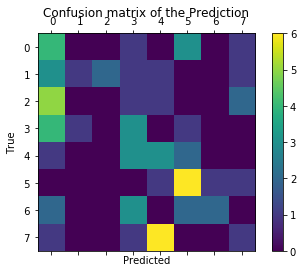

In [67]:
labels = [' 0', ' 1', ' 2', ' 3', ' 4', ' 5',' 6', ' 7']
fig = plt.figure()
ax = fig.add_subplot(111)
cax = ax.matshow(cm)
plt.title('Confusion matrix of the Prediction')
fig.colorbar(cax)
ax.set_xticklabels([''] + labels)
ax.set_yticklabels( [''] + labels)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

In [68]:
print ('\n Summary for each class:')
print (sklearn.metrics.classification_report(Y_test, y_pred))


 Summary for each class:
             precision    recall  f1-score   support

          0       0.20      0.44      0.28         9
          1       0.50      0.11      0.18         9
          2       0.00      0.00      0.00         9
          3       0.23      0.33      0.27         9
          4       0.25      0.33      0.29         9
          5       0.43      0.67      0.52         9
          6       0.67      0.22      0.33         9
          7       0.17      0.11      0.13         9

avg / total       0.31      0.28      0.25        72

